### Group: Code Brewers
#### Members:
Pasamanero, Kaire Edzel Z.

Punzalan, Miles Chrisvian B.

Zaulda, Maive T.

### STEP 1: DEFINE YOUR CNN ARCHITECTURE 
- Imports the packages needed 
>The code cell below contains loading the tensorflow library and other helper libaries like numpy for handling numbers and matplotlib.pyplot for visualization. Also the keras library which contains the different imports for the CNN model. Those libraries are imported using the keyword import. 
- Declaration of parameters
>In the code cell below nb_filters,nb_pool,nb_conv, batch_size,nb_classes, and nb_epoch is declared into its corresponding values, then a sequential model is made named as model.
- Building the CNN architecture
>A convolution neural network is used as a model instead of a feed-forward model. After that convolutional pooling is done first in which filters are made to determine the important features only of the images or it gets smaller portions in an image, and then in the pooling layers summarizes the features present at the feature map of the image generated at the convolutional layer. Lastly in the fully connected layer will flatten the new figure from the pooling layer then will convert it in a matrix and then applies the filter and whichever it has the highest probability in the softmax will be the category of the image.

In [1]:
#import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

img_rows, img_cols = 150, 150

#declaration of parameters
nb_filters = 32
nb_pool = 2
nb_conv = 3

batch_size = 32
nb_classes = 3
nb_epoch = 150

#Model
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=(img_rows, img_cols, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

### STEP 2: LOAD THE SAVED PREDICTION MODEL FILE
> The saved model which has the best accuracy results when it comes to predicting and is already trained and tested in determining psoriasis identification will be then loaded so that it can be attached to the Graphical User Interface which will be used by the users. The .load_weights is used to load the weights from the saved model.

In [2]:
#Loading the model
model.load_weights('cbpsoriaris.hdf5')

### STEP 3: EXECUTE THE PREDICTION GUI FOR PREDICTION
- Imports the packages and libraries needed
>Importing the packages and libraries that will be used. ImageTK and Image for the images that will be loaded for the prediction. Photoimage for the images that will be used for the GUI. tk for the widgets that will also be used in creating the GUI. getpass is used to prompt to users using the string prompt and reads the input from the user as Password. os provides functions for interacting with the operating system. io rovides an easy interface to read and write a wide range of image data. numpy so we'll be able to work with arrays. skimage and its subpackages for image processing and computer vision.

- Creation of the GUI
>Creating the GUI that will be used by a user in inputting the image/s that needs to be predicted. This contains widgets such as buttons, labels, etc.

- Image Processing
>The images that will be inputted by the user will undego the same image process in creating the model. It will be resizeda and turned into grayscale.

- Prediction
>Lastly, the prediction of the inputted image will occur and the label will be displayed.

C:/Users/Miles/OneDrive/Documents/PICS GROUP


<ipython-input-9-08e93d80b719>:55: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img1 = color.rgb2gray(imageio.imread(fileentry.cget("text")))


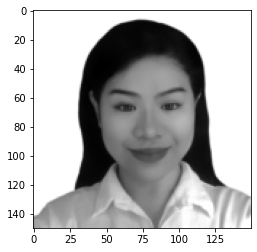

In [9]:
from PIL import ImageTk, Image
import tkinter.filedialog
import tkinter as tk
import getpass
import os
import imageio
import numpy
from skimage.transform import resize
from skimage import data
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

root = tk.Tk()
user = getpass.getuser()
root.title("Code Brewers - Elective 4 Final Project")
root.resizable(0, 0)

canvas = tk.Canvas(root, width=700, height=650,bg='#FFFFFF')
canvas.pack()

# load the image file
image = ImageTk.PhotoImage(file='bg.png')
canvas.create_image(500,350, image=image)

Header=tk.Label(root, text="PSORIASIS DETECTION", bg='#696d7d',fg='white',font=('times new roman bold',30))
canvas.create_window(350,45,window=Header,width=1500)
Header= tk.Label(root,text="Identifies the severity of psoriasis: Normal, Mild, Severe", 
                 bg='lightgray',fg='black',font=('arial',12))
canvas.create_window(350,75,window=Header,width=1500)

desc = tk.Label(root,text="Click on browse to open image.", 
                 bg='#ffe5d9',fg='black',font=('arial',10))
canvas.create_window(350,140,window=desc,width=250)

def browseImage():
  global file
  global fileentry
  global img
  file = tkinter.filedialog.askopenfilename(initialdir='C:/Users/%s' % user)
  directory =os.path.split(file)[0]
  print(directory)
  fileentry = tk.Label(root, text=file, bg='#915858',fg='WHITE',font='arial 10')
  canvas.create_window(350,330,window=fileentry,width=1500)
  img = Image.open(file)
  img = img.resize((350,150))
  img = ImageTk.PhotoImage(img)

  canvas.create_image(350,240,image=img)
  root.mainloop()
  plt.show

def predict():
    img1 = color.rgb2gray(imageio.imread(fileentry.cget("text")))
    img1=resize(img1,(150,150)).astype(np.float32,casting='unsafe')
    plt.imshow(img1,cmap='gray')
    maxidx = model.predict(img1.reshape([-1,150,150,1]))
    max_ind = np.array(maxidx)
    max_val = max_ind[0,maxidx.argmax()]
    i,j=np.unravel_index(maxidx.argmax(),maxidx.shape)

    mild=(np.argmax(maxidx[0]))

    if mild==0:
      strMild = "Mild"
    elif mild==1:
      strMild = "Severe"
    elif mild==2:
      strMild = "Normal"

    result=strMild
    percent=str(np.round(max_val*100))

    label.configure(text=""+percent+" % "+result)

    same =True
    n=2

    root.mainloop()
    plt.show

button = tk.Button(root,command=browseImage,bg='#915858',fg='white',text='     Browse     ', font='arial 11')
canvas.create_window(350,110,window=button)

#button to vall the 'values' command above
button1 = tk.Button(root, text='Predict Image', command=predict,bg='#915858',fg='white',font='arial 11')
canvas.create_window(350,370,window=button1)

label=tk.Label(root,text="", bg='lightgray',fg="black",font="arial 16 bold")
canvas.create_window(350,415,window=label)

desc = tk.Label(root,text="Sample Images per Category", 
                 bg='gray',fg='white',font="arial 10 bold")
canvas.create_window(350,450,window=desc,width=250)

desc = tk.Label(root,text="Normal", 
                 bg='gray',fg='white',font="arial 10 bold")
canvas.create_window(150,480,window=desc,width=60)
norm = ImageTk.PhotoImage(file='normal_007.png')
canvas.create_image(150,570,image=norm)

desc = tk.Label(root,text="Mild", 
                 bg='gray',fg='white',font="arial 10 bold")
canvas.create_window(350,480,window=desc,width=60)
mild = ImageTk.PhotoImage(file='mild_019.png')
canvas.create_image(350,570,image=mild)

desc = tk.Label(root,text="Severe", 
                 bg='gray',fg='white',font="arial 10 bold")
canvas.create_window(550,480,window=desc,width=60)
sev = ImageTk.PhotoImage(file='severe_001.png')
canvas.create_image(550,570,image=sev)

root.mainloop()